<h3>Definiendo una estrategia de cruce con la SMA</h3>
Siguiendo el curso de trading algorítmico, este es el primer código que voy
a copiar para entender lo que hace el instructor

In [16]:
# se realizan todas las importaciones necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

A continuación se va a establecer el estilo de gráficación (seaborn), es necesario notar que en el curso usan el comando <code>plt.style.use("seaborn")</code> que aparentemente está obsoleto por lo que el comando correcto es el de la siguienter celda.

In [17]:
plt.style.use('seaborn-v0_8-whitegrid')

In [36]:
"""
Se importan los datos de EUR/USD desde un archivo csv. El archivo debe residir en la misma
carpeta qwue el script
"""
data = pd.read_csv("Scripts/eurusd.csv", parse_dates=["Date"], index_col = "Date")

Como se desea diseñar una estrategia de cruce con la media móvil simple, para ello se deben establecer 2 medias: Una corta (50 períodos) y otra larga de 200 períodos. Los valores anteriores de los períodos corresponden a los usados en la lección. Si aparecen otros valores diferentes se debe a que se probó el código con valores diferentes.

In [37]:
sma_s = 50
sma_l = 200

In [38]:
data.price.rolling(50).mean()

Date
2004-01-01         NaN
2004-01-02         NaN
2004-01-05         NaN
2004-01-06         NaN
2004-01-07         NaN
                ...   
2020-06-24    1.101794
2020-06-25    1.102486
2020-06-26    1.103213
2020-06-29    1.103931
2020-06-30    1.104695
Name: price, Length: 4275, dtype: float64

Como se van a calcular medias móviles de 50 y 200 períodos, entonces para las medias de 50 los primeros 49 valores son NaN porque estos son incalculables. Igual para los 199 primeros valores de la media de 200.
También se van a agregar estas columnqas al dataframe.

In [39]:
data['SMA_S'] = data.price.rolling(sma_s).mean()

In [40]:
data['SMA_L'] = data.price.rolling(sma_l).mean()

In [43]:
data.iloc[0:220].to_csv("rango_filas..txt", sep="\t")

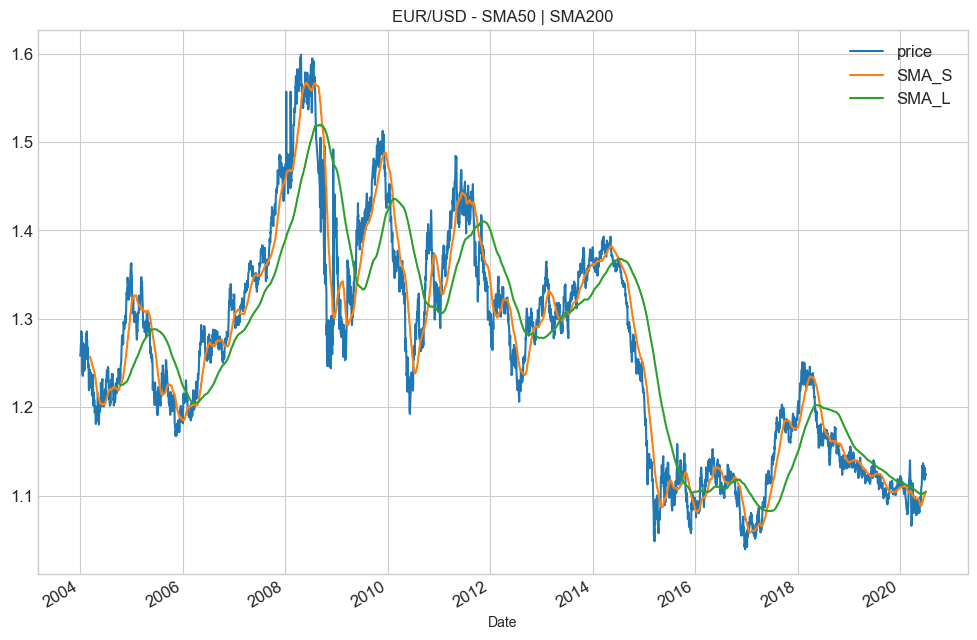

In [24]:
  # graficación de los datos
data.plot(figsize = (12, 8), title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l),fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [25]:
data.dropna(inplace= True)
data

,price,SMA_S,SMA_L
Date,,,
2004-10-06,1.228094,1.221318,1.226222
2004-10-07,1.229906,1.221840,1.226081
2004-10-08,1.241003,1.222628,1.225995
2004-10-11,1.238405,1.223352,1.225843
2004-10-12,1.232104,1.223888,1.225643
...,...,...,...
2020-06-24,1.131235,1.101794,1.103430
2020-06-25,1.125087,1.102486,1.103540
2020-06-26,1.122208,1.103213,1.103627


En la anterior se ejecutó el método .dropna para eliminar los valores NaN (se eliminan 199 filas porque SMA(200) tiene las primeras 199 filas con valor NaN) Volviendo a graficar para comparación:

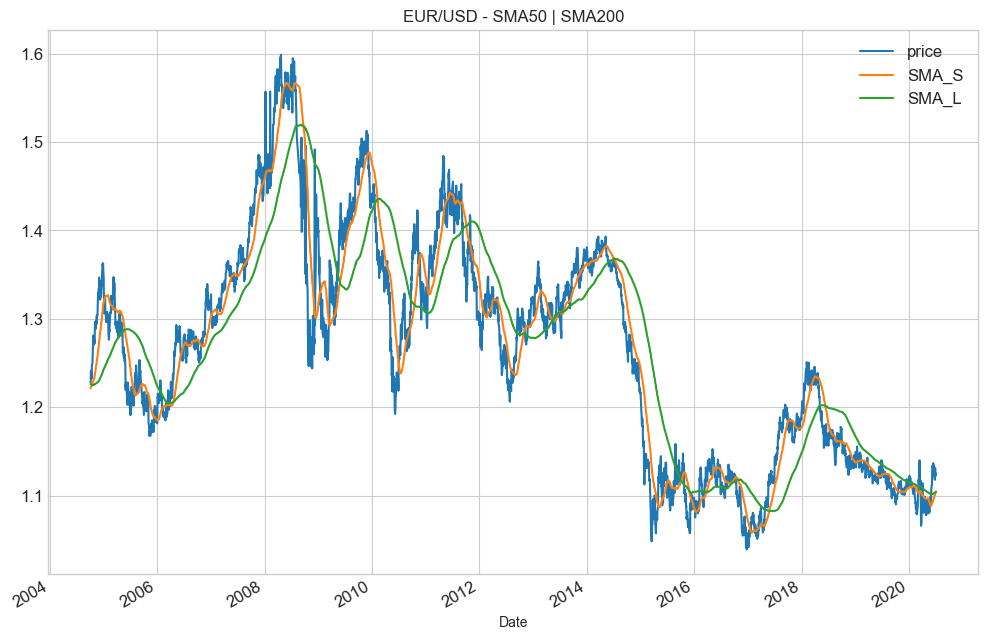

In [26]:
data.plot(figsize = (12, 8), title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l),fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

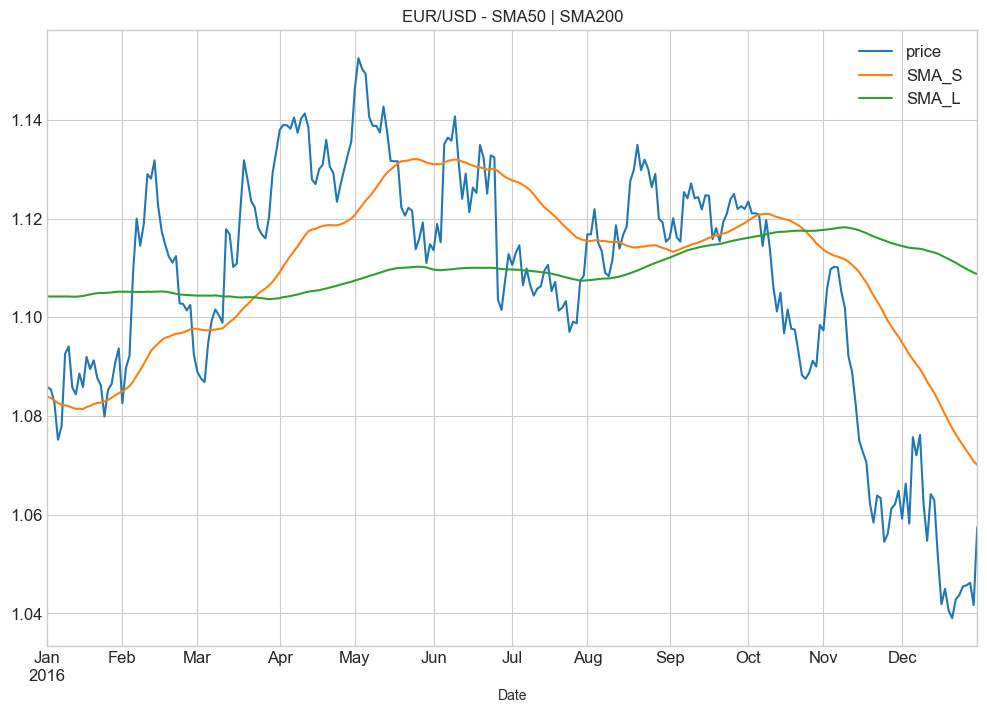

In [27]:
# tomando en cuenta los datos de un solo año por ejemplo 2016
data.loc["2016"].plot(figsize= (12,8), title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l),fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [28]:
"""Crea dos nuevas columnas en el dataframe, una cuando la sma corta es mayor que
   la sma larga (+1) y otra en caso contrario (-1)"""

data['position'] = np.where(data['SMA_S'] > data['SMA_L'], 1, -1)
data

,price,SMA_S,SMA_L,position
Date,,,,
2004-10-06,1.228094,1.221318,1.226222,-1
2004-10-07,1.229906,1.221840,1.226081,-1
2004-10-08,1.241003,1.222628,1.225995,-1
2004-10-11,1.238405,1.223352,1.225843,-1
2004-10-12,1.232104,1.223888,1.225643,-1
...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1
2020-06-25,1.125087,1.102486,1.103540,-1
2020-06-26,1.122208,1.103213,1.103627,-1


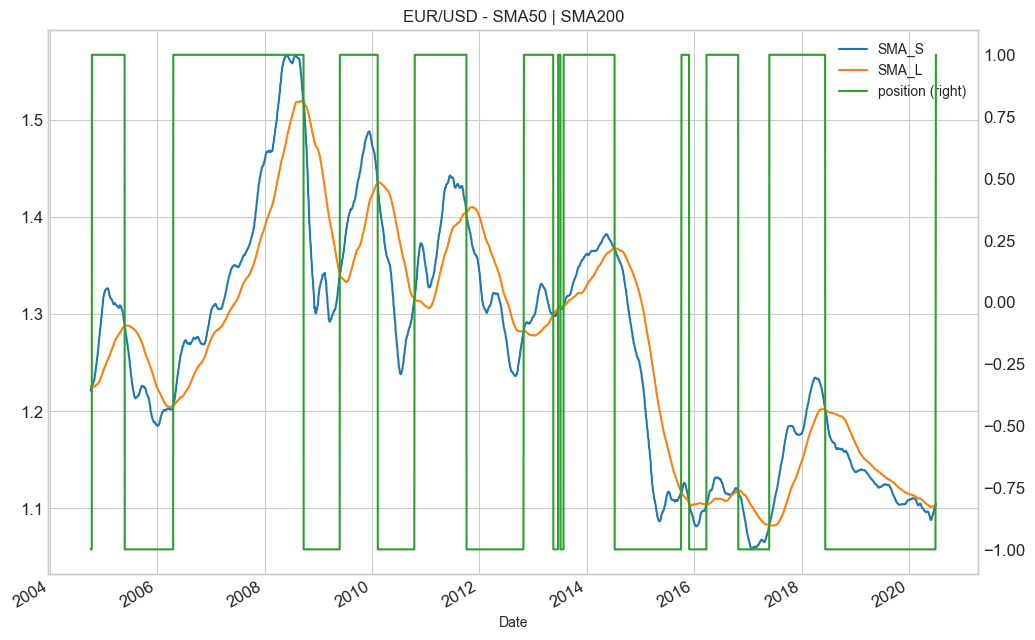

In [29]:
data.loc[:, ['SMA_S', 'SMA_L', 'position']].plot(figsize=(12, 8), \
        fontsize = 12, secondary_y = 'position', \
        title= "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l))
plt.show()

Text(0.5, 1.0, 'EUR/USD - SMA50 | SMA200')

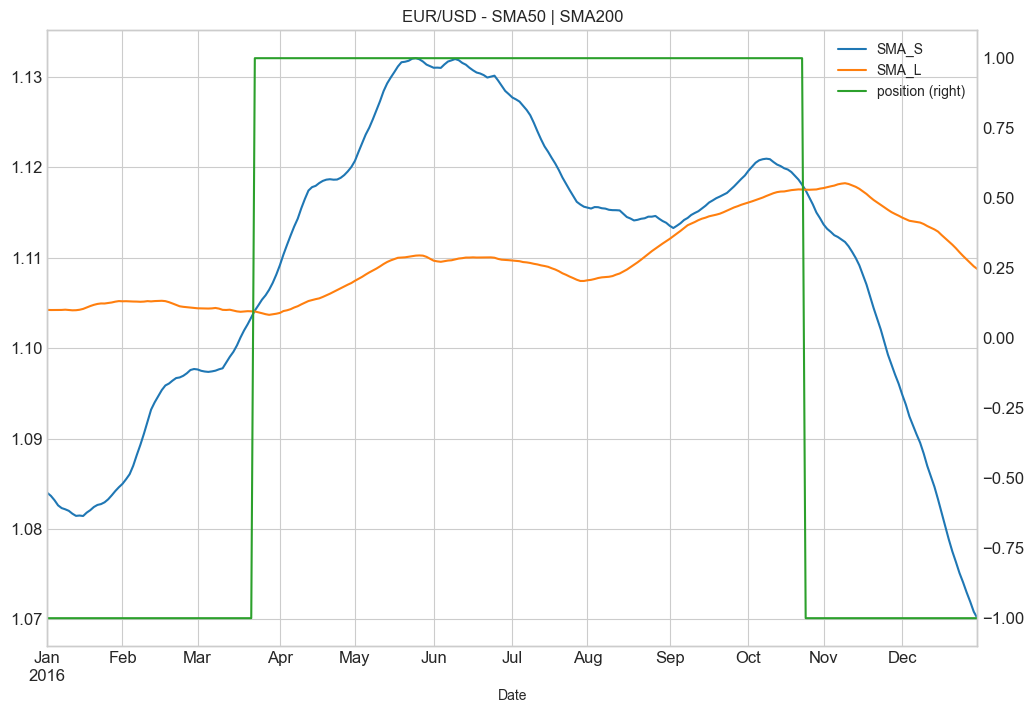

In [30]:
# para enfocarnos en el año 2016
data.loc["2016", ["SMA_S", "SMA_L", "position"]].plot(figsize=(12, 8), \
            fontsize = 12, secondary_y = 'position') \
            .set_title("EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l))

En la gráfica anterior se observa la base de esta estretegia de cruces de las medias móviles. A nediados de marzo 2016 la media móvil corta cruza hacia arriba a la media móvil larga y el estado cambia de corto a largo (de -1 a 1). Luego a finales de Octubre 2016 la media móvil corta cruza hacia abajo de la media móvil larga y el estado (la posición) cambia de 1 a -1. 